In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_excel('US Superstore data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [28]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])
missing_percent = (df.isnull().sum() / len(df)) * 100

print(missing_percent)

Row ID           0.0
Order ID         0.0
Order Date       0.0
Ship Date        0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Postal Code      0.0
Region           0.0
Product ID       0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
Sales            0.0
Quantity         0.0
Discount         0.0
Profit           0.0
dtype: float64


In [29]:
# Create Year column for trend analysis
df["Year"] = df["Order Date"].dt.year
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015


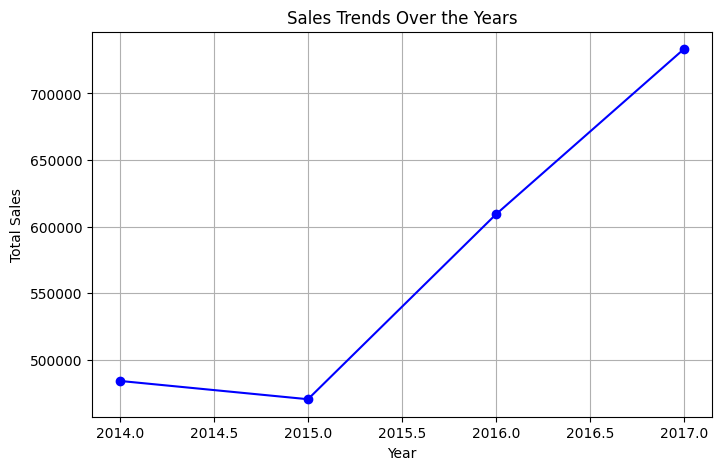

In [30]:
# 2. DATA VISUALIZATION WITH MATPLOTLIB
# Line chart - Sales trend by year

sales_trend = df.groupby("Year")["Sales"].sum()
plt.figure(figsize=(8,5))
plt.plot(sales_trend.index, sales_trend.values, marker='o', linestyle='-', color='b')
plt.title("Sales Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

In [31]:
state_codes = {
    'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA','Colorado':'CO',
    'Connecticut':'CT','Delaware':'DE','District of Columbia':'DC','Florida':'FL','Georgia':'GA',
    'Hawaii':'HI','Idaho':'ID','Illinois':'IL','Indiana':'IN','Iowa':'IA','Kansas':'KS','Kentucky':'KY',
    'Louisiana':'LA','Maine':'ME','Maryland':'MD','Massachusetts':'MA','Michigan':'MI','Minnesota':'MN',
    'Mississippi':'MS','Missouri':'MO','Montana':'MT','Nebraska':'NE','Nevada':'NV','New Hampshire':'NH',
    'New Jersey':'NJ','New Mexico':'NM','New York':'NY','North Carolina':'NC','North Dakota':'ND',
    'Ohio':'OH','Oklahoma':'OK','Oregon':'OR','Pennsylvania':'PA','Rhode Island':'RI',
    'South Carolina':'SC','South Dakota':'SD','Tennessee':'TN','Texas':'TX','Utah':'UT','Vermont':'VT',
    'Virginia':'VA','Washington':'WA','West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'
}

state_sales = df.groupby("State", as_index=False)["Sales"].sum()

state_sales["State Code"] = state_sales["State"].map(state_codes)

map_fig = px.choropleth(
    state_sales,
    locations="State Code",
    locationmode="USA-states",
    color="Sales",
    scope="usa",
    title="Sales Distribution by State",
    color_continuous_scale="Blues",
    hover_name="State",
    hover_data={"Sales":":,.0f"}
)

map_fig.show()

/tmp/ipython-input-1616487602.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




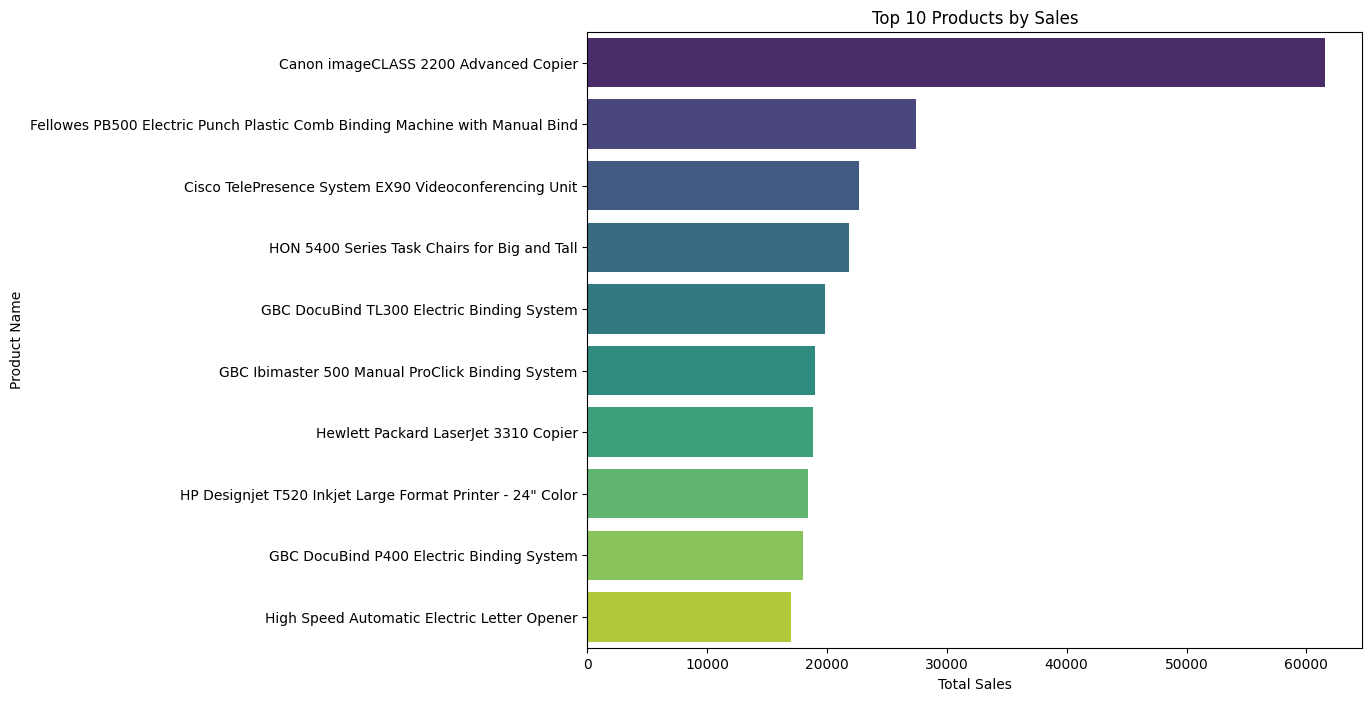

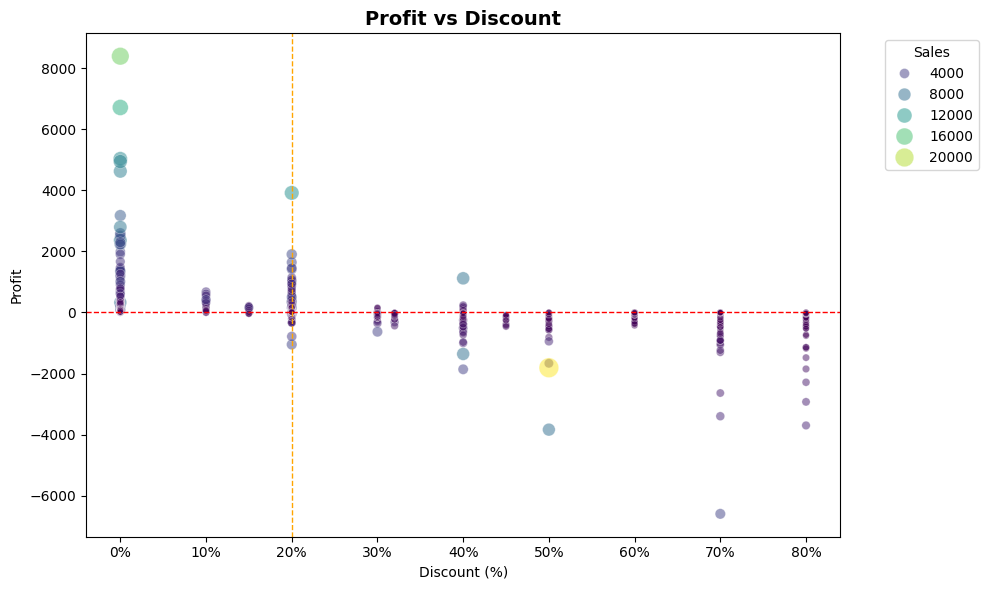

In [32]:
# 3. DATA VISUALIZATION WITH SEABORN
# -----------------
import matplotlib.ticker as mtick

# Bar chart - Top 10 products by sales
top_products = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()

# Scatter plot - Profit vs Discount
plt.figure(figsize=(10,6))

sns.scatterplot(
    x="Discount",
    y="Profit",
    data=df,
    alpha=0.5,
    hue="Sales",
    size="Sales",
    palette="viridis",
    sizes=(20, 200),
    legend="brief"
)

# Линии для ориентира
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.axvline(0.2, color="orange", linestyle="--", linewidth=1)  # 20% скидка

plt.title("Profit vs Discount", fontsize=14, weight="bold")
plt.xlabel("Discount (%)")
plt.ylabel("Profit")

# Форматируем ось X в проценты
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.legend(title="Sales", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [33]:
#4. COMPARATIVE ANALYSIS
# -----------------
# Observations (to be included in notebook as markdown or comments):
# - Matplotlib provides strong control over plot customization but requires more code.
# - Seaborn is more concise, with built-in themes and better default styling.
# - For exploratory data analysis, Seaborn is faster and cleaner.
# - For precise, custom visualizations (e.g., interactive dashboards), Matplotlib (and Plotly) is more flexible.

# -----------------
# 5. CODE & INSIGHTS
# -----------------
# This script demonstrates:
# - Basic preprocessing (cleaning missing values, duplicates, adding time features)
# - Sales trend analysis with Matplotlib
# - Sales distribution across countries with an interactive Plotly map
# - Product performance and pricing strategy exploration using Seaborn
#
# Insights:
# - Sales increased over the years, showing business growth.
# - Certain products dominate sales; these should be promoted.
# - Discounts heavily impact profit (negative correlation); discounting strategy must be optimized.
# - Sales are concentrated in specific regions, useful for targeted marketing campaigns.
